In [102]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [103]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [104]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

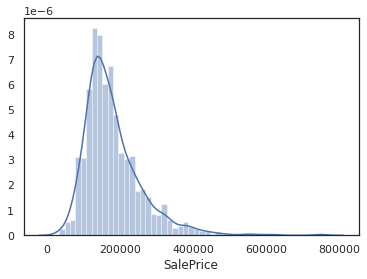

In [105]:
sns.distplot(df_train['SalePrice']);

In [106]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- Id dropped, due to relevance
- MSSubClass dropped due to the information being repeated from other features
- Street dropped due to highly mismatched counts of values
- 

In [107]:
df_train = df_train.drop(['Id', 'MSSubClass', 'Street'], axis=1)

In [108]:
df_train

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,RL,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,RL,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,RL,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,RL,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,RL,85.0,13175,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,RL,66.0,9042,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,RL,68.0,9717,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


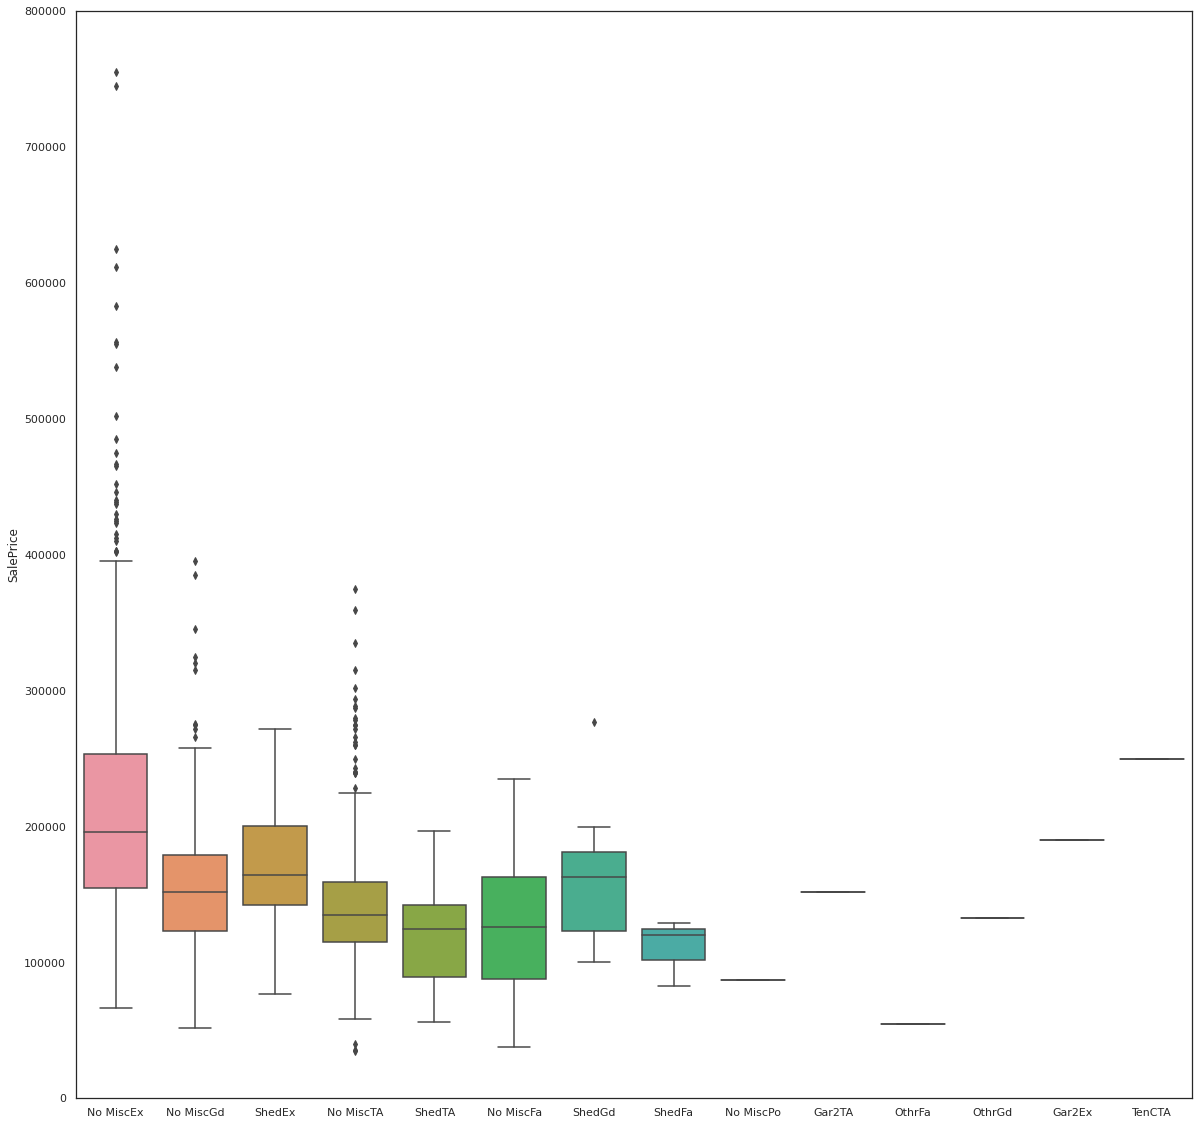

In [109]:
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

df_train.MiscFeature.fillna(value='No Misc', inplace=True)
var = 'MiscFeature'
k = df_train[var] + df_train['HeatingQC']
data = pd.concat([df_train['SalePrice'], k], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=k, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

<AxesSubplot:>

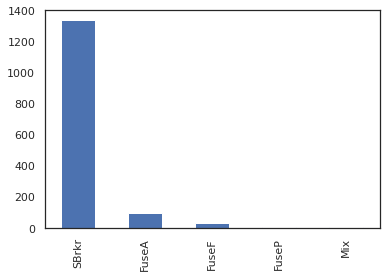

In [110]:
df_train['Electrical'].value_counts().plot(kind='bar')

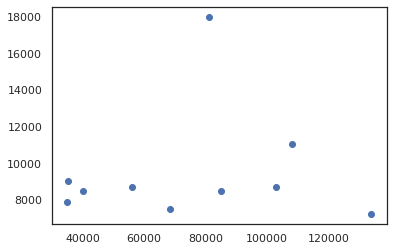

In [111]:
cond = df_train['MSZoning'] == 'C (all)'
temp_df = df_train[cond]
plt.scatter(y=temp_df['LotArea'], x=temp_df['SalePrice'])

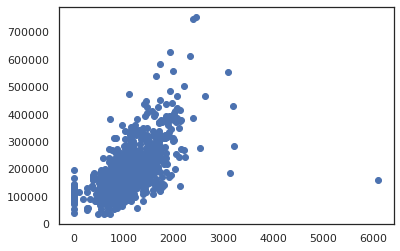

In [112]:
plt.scatter(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'])

<AxesSubplot:>

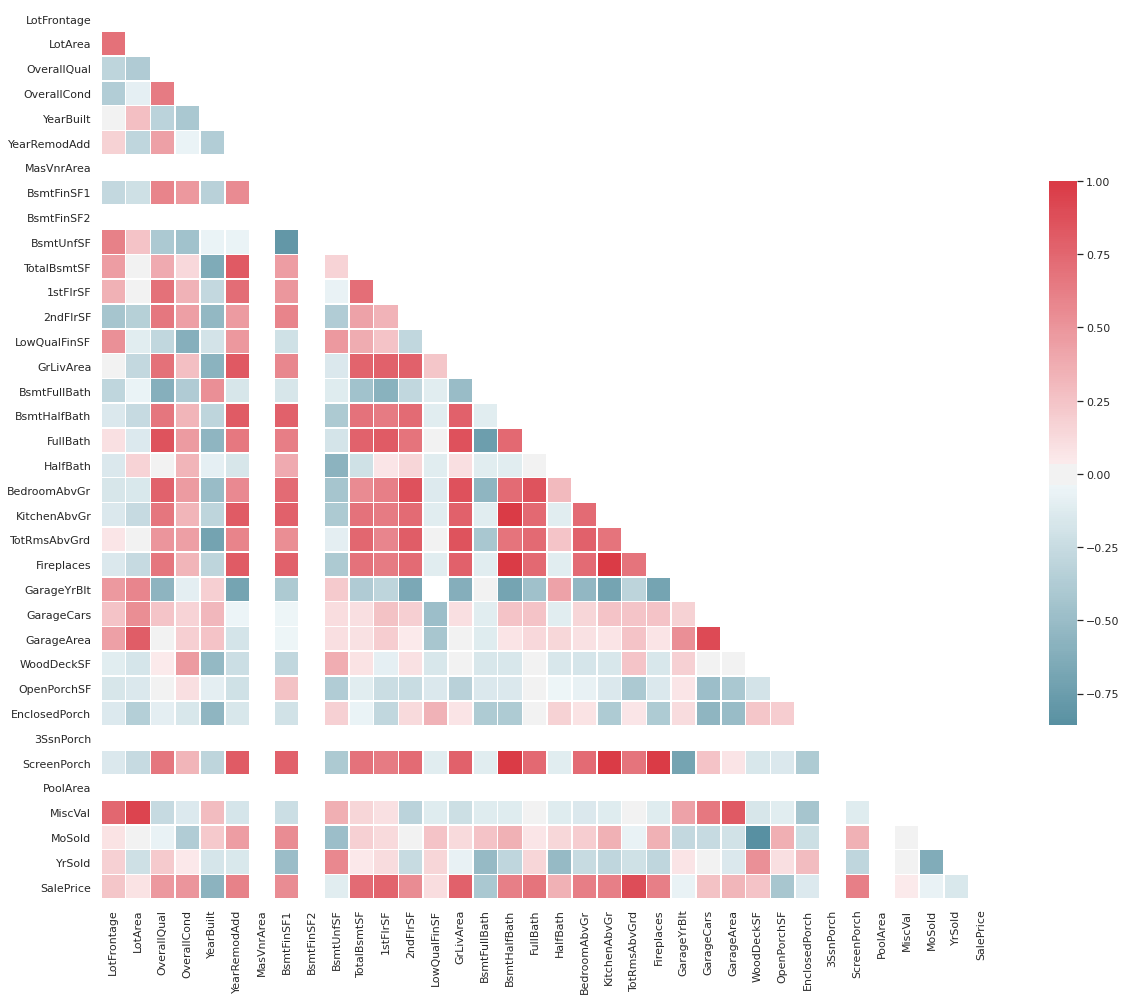

In [113]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
d = temp_df

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Removing, Month Sold, Year sold, and Miscval, since they have very low correlation to the Salesprice

In [114]:
df_train = df_train.drop(['MoSold', 'YrSold', 'MiscVal', 'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF'], axis=1)

In [115]:
df_train = df_train.drop(['GarageArea', 'GarageYrBlt', 'TotalBsmtSF'], axis=1)

Checking correlation between some features

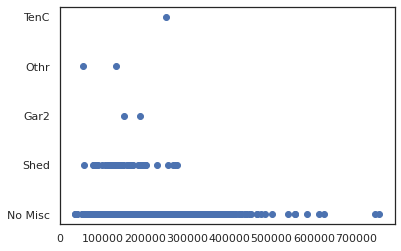

In [116]:
plt.scatter(x=df_train['SalePrice'], y=df_train['MiscFeature'])

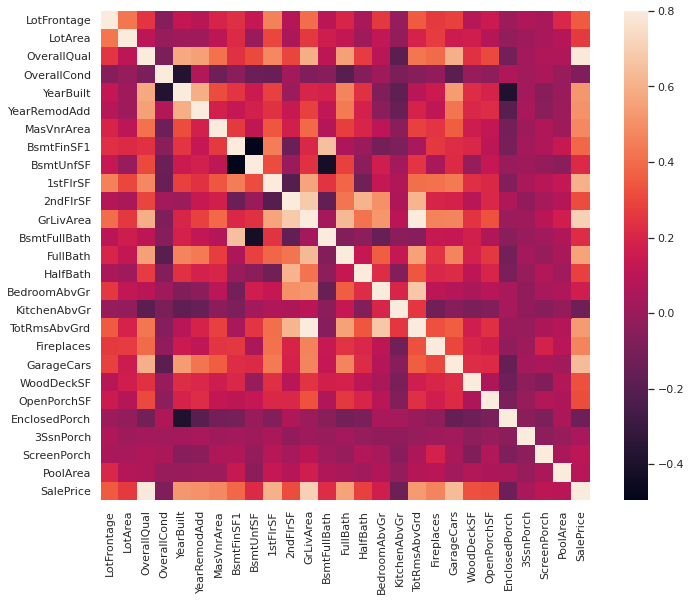

In [120]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

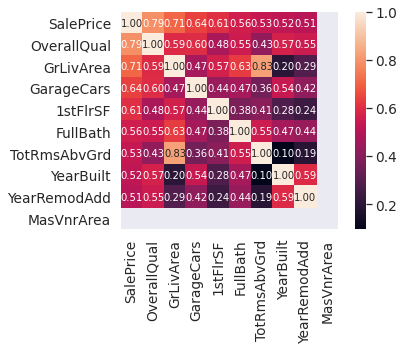

In [121]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/home/christiankohl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


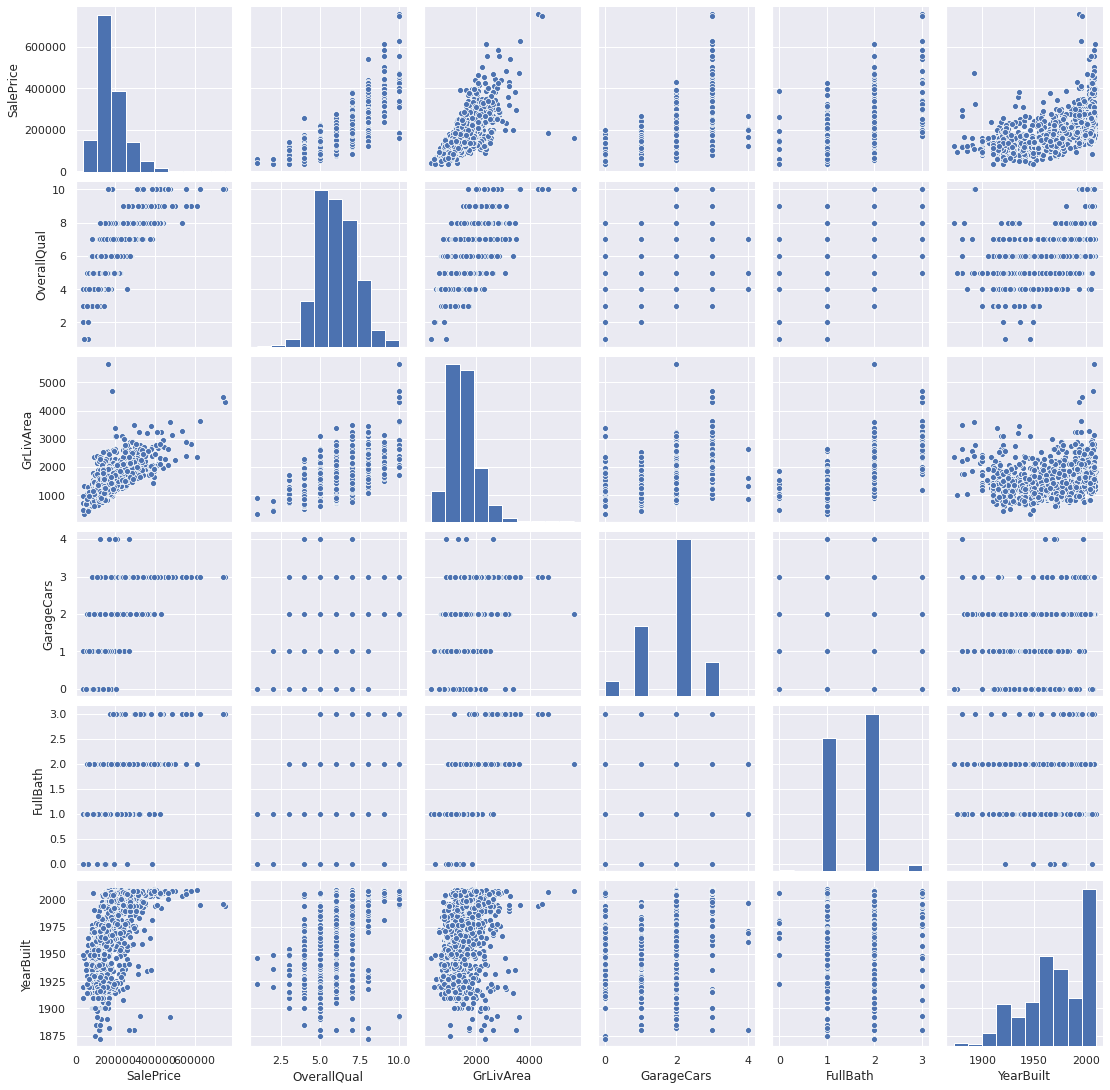

In [123]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [128]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageFinish,81,0.055479
GarageType,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479
BsmtExposure,38,0.026027


In [129]:
temp_df = df_train.drop(['PoolQC', 'Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'LandContour', 'LandSlope', 'Utilities'], axis=1)
df_train = temp_df

In [131]:
df_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object

In [134]:
# Numerical Features
categorical = df_train.select_dtypes(include=['object']).columns
numerical = df_train.select_dtypes(exclude=['object']).columns


In [136]:
categorical

Index(['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')